## importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analysing Dataset

In [2]:
df=pd.read_csv("./train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

#### keeping only useful features

In [129]:
df=df[["Id","LotArea","FullBath","BedroomAbvGr","SalePrice"]]

In [130]:
df.head()

,Id,LotArea,FullBath,BedroomAbvGr,SalePrice
0,1,8450,2,3,208500
1,2,9600,2,3,181500
2,3,11250,2,3,223500
3,4,9550,1,3,140000
4,5,14260,2,4,250000


#### checking for missing/null values

In [131]:
df.isnull().sum()

Id              0
LotArea         0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

#### checking for duplicate values

In [132]:
df["Id"].duplicated().sum()

0

#### checking for ouliers if any

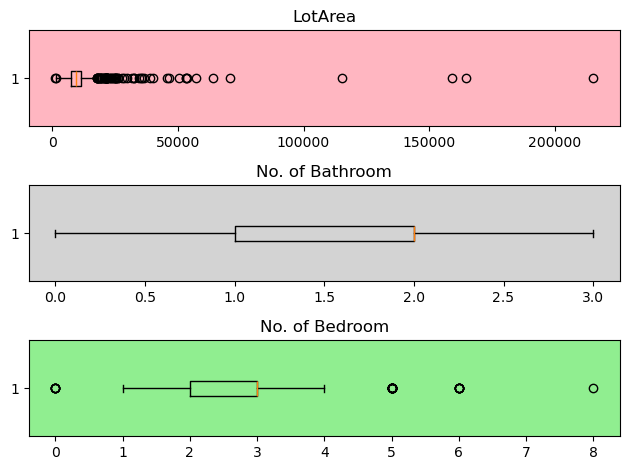

In [133]:
plt.subplot(3,1,1,facecolor="lightpink")
plt.boxplot(df['LotArea'], vert=False)
plt.title("LotArea")

plt.subplot(3,1,2,facecolor="lightgrey")
plt.boxplot(df['FullBath'], vert=False)
plt.title("No. of Bathroom")

plt.subplot(3,1,3,facecolor="lightgreen")
plt.boxplot(df['BedroomAbvGr'], vert=False)
plt.title("No. of Bedroom")

plt.tight_layout()
plt.show()

##### there are some outlier present in LotArea and No. of Bedroom so we need to remove them

##### Removing outlier in LotArea

In [134]:
# calculate summary statistics 
mean = df["LotArea"].mean() 
std  = df["LotArea"].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

print("LotArea")
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df = df[(df["LotArea"] >= lower_bound) & (df["LotArea"] <= upper_bound)]

LotArea
Lower Bound : -9445.701782566512
Upper Bound : 30479.357946950076


##### Removing outlier in No. of Bedroom

In [135]:
# calculate summary statistics 
mean = df["BedroomAbvGr"].mean() 
std  = df["BedroomAbvGr"].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

print("No. of Bedroom")
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df = df[(df["BedroomAbvGr"] >= lower_bound) & (df["BedroomAbvGr"] <= upper_bound)]

No. of Bedroom
Lower Bound : 1.2398643173108006
Upper Bound : 4.487534848196849


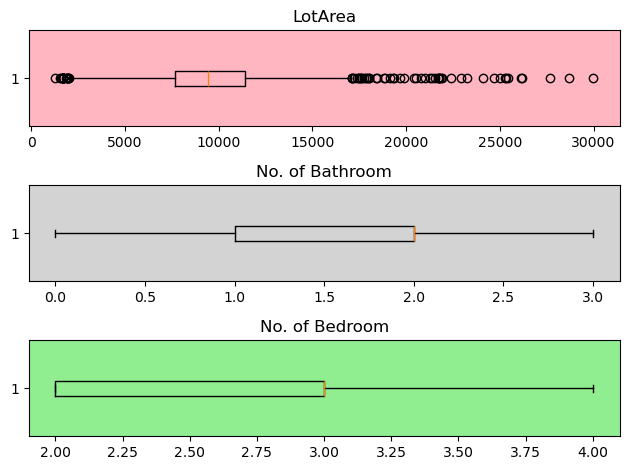

In [136]:
plt.subplot(3,1,1,facecolor="lightpink")
plt.boxplot(df['LotArea'], vert=False)
plt.title("LotArea")

plt.subplot(3,1,2,facecolor="lightgrey")
plt.boxplot(df['FullBath'], vert=False)
plt.title("No. of Bathroom")

plt.subplot(3,1,3,facecolor="lightgreen")
plt.boxplot(df['BedroomAbvGr'], vert=False)
plt.title("No. of Bedroom")

plt.tight_layout()
plt.show()

In [137]:
df.head()

,Id,LotArea,FullBath,BedroomAbvGr,SalePrice
0,1,8450,2,3,208500
1,2,9600,2,3,181500
2,3,11250,2,3,223500
3,4,9550,1,3,140000
4,5,14260,2,4,250000


#### Now our dataset is ready for applying ML Algorithms

## Applying ML Algorithm - Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [139]:
X=df.iloc[:,1:4]
Y=df.iloc[:,-1]

In [142]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=45)

In [143]:
lin_reg=LinearRegression()

In [144]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [145]:
Y_pred=lin_reg.predict(X_test)

### Calculating Cross Validation Score for linear model

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
mse=cross_val_score(lin_reg,X_train,Y_train,scoring="neg_mean_squared_error",cv=10)
print("Cross Validation Score :",mse.mean())

Cross Validation Score : -3403972963.6759596


### Calculating Mean Squared Error, Mean Absolute Error and R2 Score

In [148]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [149]:
linear_mean_absolute_error=mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error for this model :",linear_mean_absolute_error)

Mean Absolute Error for this model : 40180.10168555606


In [150]:
linear_mean_squared_error=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for this model :",linear_mean_squared_error)

Mean Squared Error for this model : 3526303064.483335


In [151]:
linear_r2_score=r2_score(Y_test,Y_pred)
print("R2 Score for this model :",linear_r2_score)

R2 Score for this model : 0.35047422147944085


### Scatter Plot for Actual V/S Predicted values

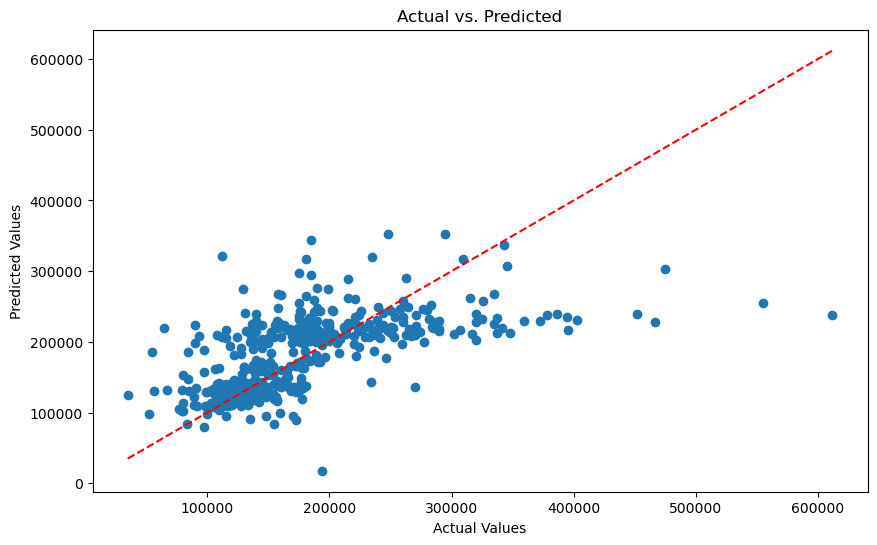

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

## Prediction of any random value

In [159]:
print("LotArea : 11250")
print("No. of Bathroom : 2")
print("No. of Bedroom : 3")
print("Price (Actual Value) : 223500")

temp = pd.DataFrame({'LotArea': [11250],'FullBath' : [2], 'BedroomAbvGr': [3]})
predicted_price = lin_reg.predict(temp)
print("Price (Predicted Value) :",predicted_price[0])

LotArea : 11250
No. of Bathroom : 2
No. of Bedroom : 3
Price (Actual Value) : 223500
Price (Predicted Value) : 224799.32396673865
